In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../../Github/ozone/ozone_model_times.csv')

In [3]:
X = df.loc[:, ~df.columns.isin(['begin_sha', 'end_sha', 'begin_time', 'end_time', 'total_time'])]

In [4]:
X

,commits,additions,deletions,changed_files,begin_Dispensables,begin_Bloaters,begin_Change Preventers,begin_Couplers,begin_Object-Orientation Abusers,end_Dispensables,end_Bloaters,end_Change Preventers,end_Couplers,end_Object-Orientation Abusers
0,1,6,3,1,2006,1130.0,1130.0,734.0,734.0,1003.0,566.0,566.0,367.0,910.0
1,4,60,0,6,1002,565.0,565.0,367.0,367.0,990.0,563.0,563.0,365.0,891.0
2,3,72,3,2,1001,565.0,565.0,365.0,365.0,983.0,568.0,568.0,366.0,900.0
3,3,393,107,7,2006,1130.0,1130.0,734.0,734.0,998.0,565.0,565.0,365.0,907.0
4,38,132,23,7,996,563.0,563.0,365.0,365.0,990.0,563.0,563.0,365.0,891.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800,3,3,2,1,734,428.0,428.0,241.0,241.0,0.0,0.0,0.0,0.0,0.0
1801,7,428,47,8,1462,854.0,854.0,482.0,482.0,0.0,0.0,0.0,0.0,0.0
1802,20,39,35,21,727,427.0,427.0,233.0,233.0,0.0,0.0,0.0,0.0,0.0
1803,7,69,0,1,886,506.0,506.0,298.0,298.0,0.0,0.0,0.0,0.0,0.0


In [5]:
scaler = preprocessing.MinMaxScaler()
df_scaler = scaler.fit_transform(X)
df_scaler_col = pd.DataFrame(df_scaler)
df_scaler = df_scaler.T

In [6]:
df_scaler.shape

(14, 1805)

In [7]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
number_of_cluster = []

for i in range(2, len(df_scaler)):
    km = KMeans(n_clusters = i)
    km.fit(df_scaler)
    sil_avg = silhouette_score(df_scaler, km.labels_).round(4)
    number_of_cluster.append([sil_avg , i])

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

In [9]:
print(f'Optimum number of cluster: {max(number_of_cluster)[1]}')

Optimum number of cluster: 3


In [10]:
number_of_cluster

[[0.6003, 2],
 [0.9128, 3],
 [0.8649, 4],
 [0.8928, 5],
 [0.7123, 6],
 [0.6774, 7],
 [0.7049, 8],
 [0.477, 9],
 [0.4579, 10],
 [0.4286, 11],
 [0.4286, 12],
 [0.4286, 13]]

In [11]:
number_of_cluster[0]

[0.6003, 2]

In [12]:
number_of_cluster.sort()

In [13]:
number_of_cluster = number_of_cluster[::-1]

In [14]:
number_of_cluster[:5]

[[0.9128, 3], [0.8928, 5], [0.8649, 4], [0.7123, 6], [0.7049, 8]]

In [15]:
df.shape

(1805, 17)

In [16]:
# Perform KMeans clustering
num_clusters = max(number_of_cluster)[1]
kmeans = KMeans(n_clusters=num_clusters)

In [17]:
from sklearn.cluster import KMeans

In [18]:
cluster_labels = kmeans.fit_predict(X)

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df['cluster'] = cluster_labels

In [20]:
df['total_time']

0          24978000000000
1          27174000000000
2          43727000000000
3         116274000000000
4         193769000000000
              ...        
1800     9439818000000000
1801     5353469000000000
1802    10442829000000000
1803    29549932000000000
1804    25333529000000000
Name: total_time, Length: 1805, dtype: int64

In [21]:
df['timedelta'] = pd.to_timedelta(df['total_time'])

In [22]:
df['timedelta'][:int(0.7 * len(df))].median()

Timedelta('3 days 02:04:47')

In [23]:
df['timedelta'].max()

Timedelta('342 days 00:18:52')

In [24]:
df['timedelta'].min()

Timedelta('0 days 00:00:09')

In [25]:
df['formatted_duration'] = df['timedelta'].apply(lambda x: f"{x.days} days {x.seconds // 3600:02d}:{(x.seconds // 60) % 60:02d}:{x.seconds % 60:02d}")

In [26]:
cluster_0 = df[df['cluster'] == 0]
print(cluster_0['timedelta'].min())
print(cluster_0['timedelta'].max())
cluster_0.shape

0 days 00:00:09
342 days 00:18:52


(1800, 20)

In [35]:
cluster_0.to_csv('ozone_cluster_0.csv' , index=False)

In [27]:
cluster_1 = df[df['cluster'] == 1]
print(cluster_1['timedelta'].min())
print(cluster_1['timedelta'].max())
cluster_1.shape

14 days 15:15:16
14 days 15:15:16


(1, 20)

In [28]:
cluster_2 = df[df['cluster'] == 2]
print(cluster_2['timedelta'].min())
print(cluster_2['timedelta'].max())
cluster_2.shape

0 days 03:39:10
20 days 15:38:07


(4, 20)

In [29]:
cluster_3 = df[df['cluster'] == 3]
print(cluster_3['timedelta'].min())
print(cluster_3['timedelta'].max())
cluster_3.shape

NaT
NaT


(0, 20)

In [30]:
df_scaler.shape

(14, 1805)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaler)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.54304247 0.44895798]
[22.62857944 20.57516097]


In [32]:
pca3 = PCA(n_components=1, svd_solver='arpack')
pca3.fit(df_scaler)
print(pca3.explained_variance_ratio_)
print(pca3.explained_variance_)
print(pca3.singular_values_)

[0.54304247]
[39.38866212]
[22.62857944]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\patcharaprapa_k\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


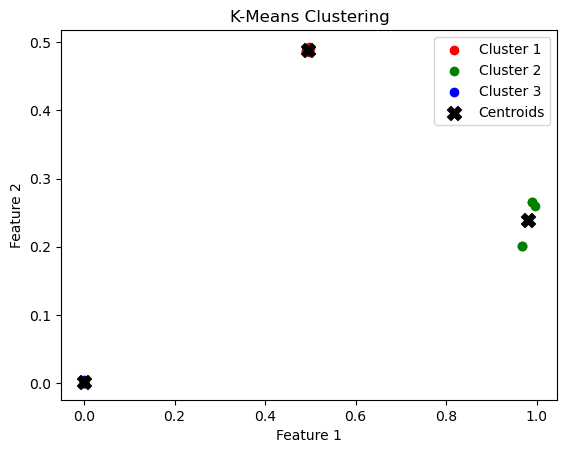

In [34]:
np.random.seed(0)
n_samples = 1805
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_scaler)
labels = kmeans.labels_

colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i in range(n_clusters):
    cluster_points = df_scaler[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, color='black', marker='X', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()